# ObsID : 0945060133, SRCNUM : 5, Instru : EPN
Not on Simbad.

## ESASky
EPIC Stack's pointer is not on the source location from XMM-Archive link. The closest pointer are far from the source. https://sky.esa.int/esasky/?target=53.59479166666666%20-28.90244444444444&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``GAIA``

- Designation : Gaia DR3 5057101614813827200
- RA : 53.5942754°
- DEC : -28.9023933°
- Parallax : 2.941 mas
- G : 19.6951

``2MASS``

- Name : 03342264-2854082
- RA : 53.5943410°
- DEC : -28.9022880°

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob("P*PNS*SRSPEC*.FTZ")[0])


1 spectrum  in use
 
Spectral Data File: P0945060133PNS003SRSPEC0005.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.830e-02 +/- 1.435e-03 (86.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-10
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.046e+04 sec
 Using fit statistic: chi
 Using Background File                P0945060133PNS003BGSPEC0005.FTZ
  Background Exposure Time: 1.046e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY7.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945060133PNS003SRCARF0005.FTZ



In [4]:
n_cts = 1.830e-02*1.046e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 191.418


## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

      No channels ignored (no channels in specified range)
     1 channels (10) ignored in spectrum #     1



(-0.5, 854.5, 660.5, -0.5)

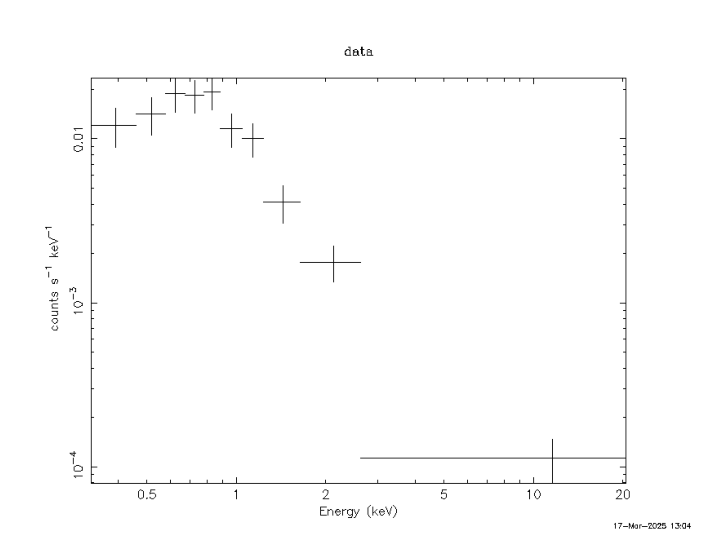

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.471941e+11     using 9 bins.

Tes

(-0.5, 855.5, 656.5, -0.5)

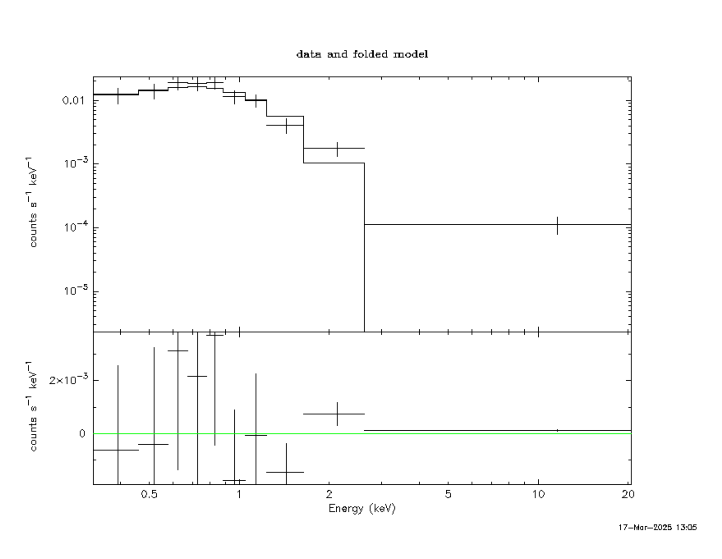

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.502165e+10     using 9 bins.

Test statistic : Chi-Squared              5.502165e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
84.481       3.47419      -1      0.262246       3.14407   1.49255e-05
20.4177      497655        0     0.0195361       2.13461   1.75770e-05
11.2036      519692       -1     0.0198911       1.40769   2.45153e-05
8.1

(-0.5, 859.5, 659.5, -0.5)

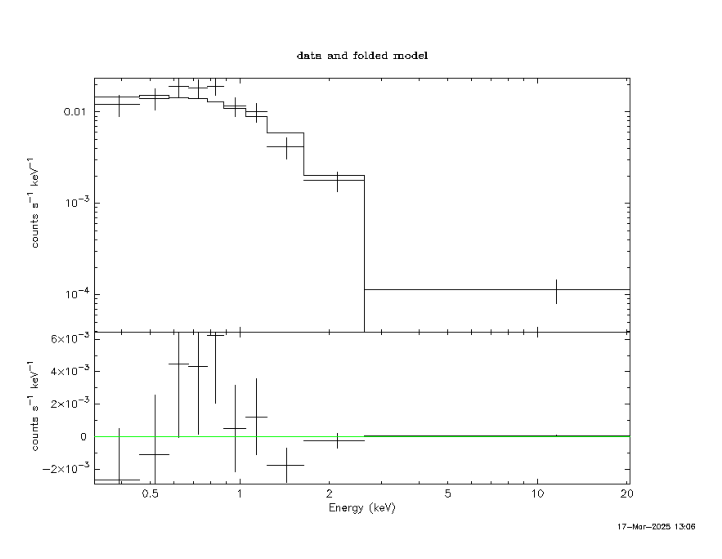

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.239709e+10     using 9 bins.

Test statistic : Chi-Squared              1.239709e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
65.9537      10.3675       0      0.952975      0.703175   8.1

(-0.5, 860.5, 659.5, -0.5)

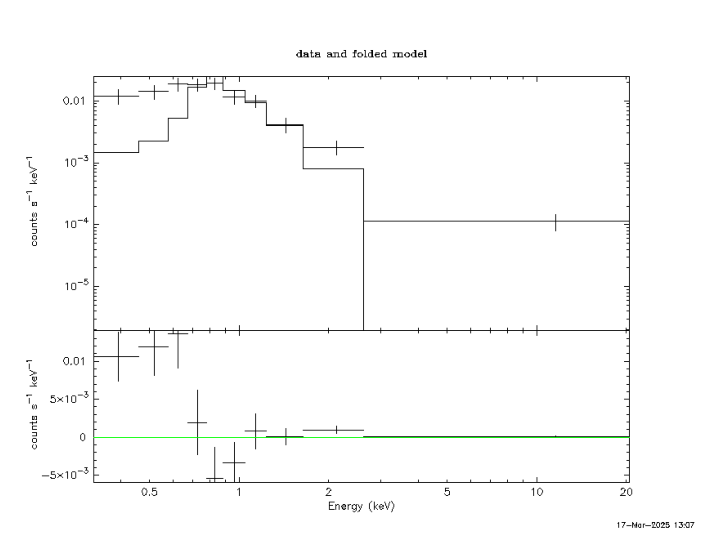

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model (Third best fit)

In [8]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.934446e+11     using 9 bins.

Test statistic : Chi-Squared              1.934446e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
116.577      2.96237      -1      0.477753       1.96222   8.41043e-06
83.4158      624358       -1      0.102338       2.75113   5.91727e-06
44.8647      1.70004e+06  -2      0.362475       3.66244   2.68291e-05
6

(-0.5, 855.5, 660.5, -0.5)

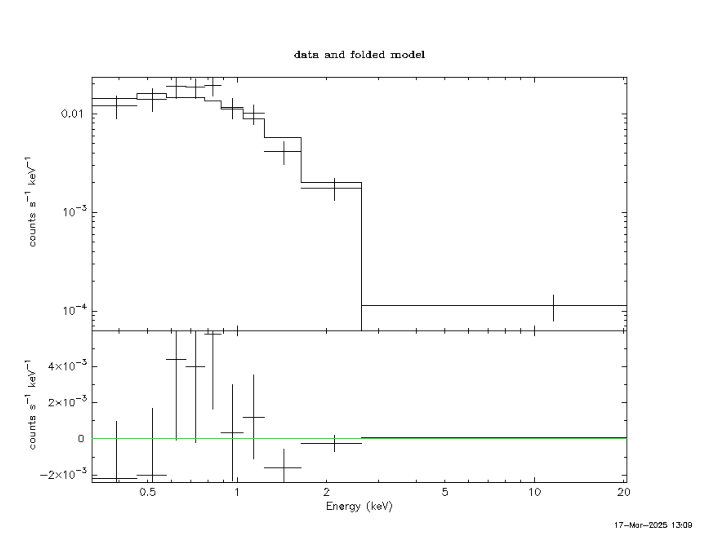

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model (Second best fit)

In [12]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.733040e+11     using 9 bins.

Test statistic : Chi-Squared              6.733040e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
116.426      44327.9    

(-0.5, 854.5, 656.5, -0.5)

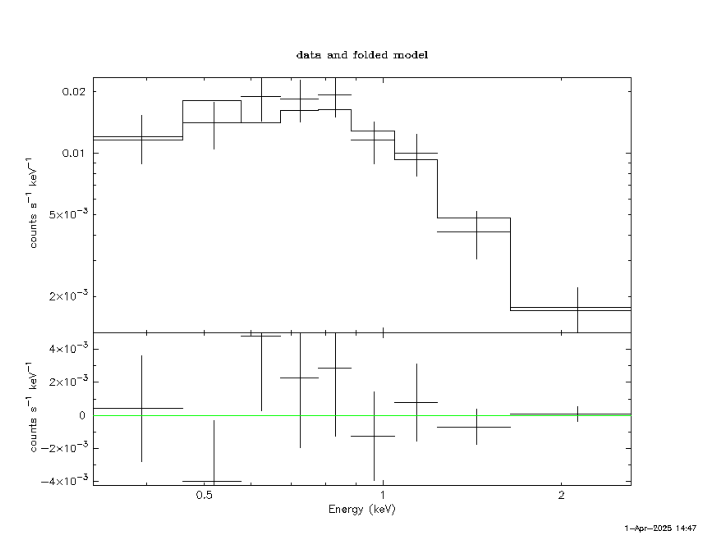

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model (Best fit)

In [14]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.542152e+11     using 9 bins.

Test statistic : Chi-Squared              4.542152e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
58.9783      14381.8   

(-0.5, 856.5, 657.5, -0.5)

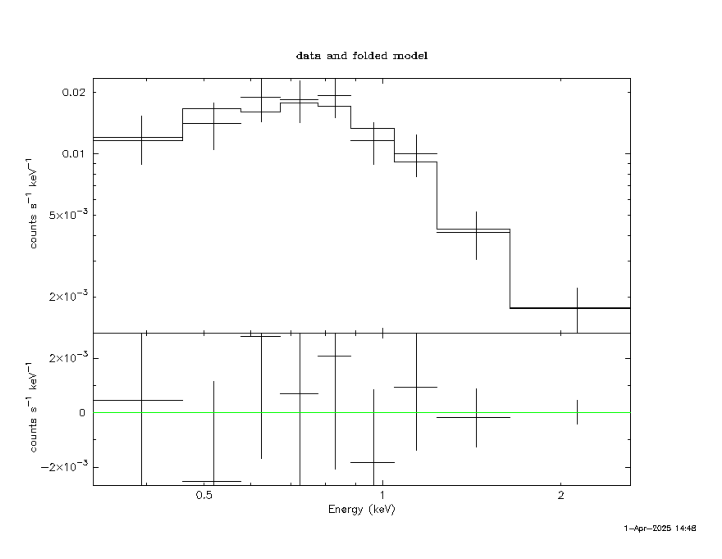

In [15]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremsspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** (GAIA)

- RA = 53.5942754°
- Dec = -28.9023933°

53.59 -28.90

**Column density :** nH = 3*10^20 cm^-2

In [18]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw (Third best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bbody+powerlaw (Second best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bremss+powerlaw (Best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 6248.491576721242

bremss
(tbabs) : 1.2967325649972686e+21

apec
(tbabs) : 6.103839626408369e+21

powerlaw (Third best fit)
(tbabs) : 2.8808350214521e+21

bbody+powerlaw (Second best fit)
(tbabs) : 2.8808350214521e+21

bremss+powerlaw (Best fit)
(tbabs) : 2.8808350214521e+21


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Bremss + Powerlaw`` with Chi-squared = 1.8306 using 9 bins: **9.5684e-12 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Black body + Powerlaw`` with Chi-squared = 3.8998 using 9 bins: **7.6947e-13 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Powerlaw`` with Chi-squared = 5.0482 using 9 bins: **5.0042e-14 ergs/cm^2/s**.
- X-ray flux of the fourth best-fitting model ``Bremss`` with Chi-squared = 5.1279 using 9 bins: **4.6027e-14 ergs/cm^2/s**.

In [2]:
Flux_bp = 9.5684e-12 # ergs/cm^2/s
Flux_bbp = 7.6947e-13 # ergs/cm^2/s
Flux_pow = 5.0042e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremss + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")
print(f"Black body + Powerlaw : F_x-ray = {Flux_bbp} ergs/cm^2/s")
print(f"Powerlaw : F_x-ray = {Flux_pow} ergs/cm^2/s")

X-ray flux : 
Bremss + Powerlaw : F_x-ray = 9.5684e-12 ergs/cm^2/s
Black body + Powerlaw : F_x-ray = 7.6947e-13 ergs/cm^2/s
Powerlaw : F_x-ray = 5.0042e-14 ergs/cm^2/s


### Optical flux

In [20]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 19.6951

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.390430542671063e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [21]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END)
print(f"Bremss + Powerlaw : F_x-ray/F_optical = {Flux_bp/F} ergs/cm^2/s")
print(f"Black body + Powerlaw : F_x-ray/F_optical = {Flux_bbp/F} ergs/cm^2/s")
print(f"Powerlaw : F_x-ray/F_optical = {Flux_pow/F} ergs/cm^2/s")

X-ray flux / Optical flux ratio : 
Bremss + Powerlaw : F_x-ray/F_optical = 68.81609477319728 ergs/cm^2/s
Black body + Powerlaw : F_x-ray/F_optical = 5.534041265533642 ergs/cm^2/s
Powerlaw : F_x-ray/F_optical = 0.3599029111074305 ergs/cm^2/s


## Luminosity

In [3]:
"""GAIA"""

P_mas = 2.941 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s
Luminosity_bbp = 4*np.pi*Flux_bbp*(d_cm)**2 # erg/s
Luminosity_pow = 4*np.pi*Flux_pow*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity : "+color.END)
print(f"Bremss + Powerlaw : L_x-ray = {Luminosity_bp} ergs/cm^2/s")
print(f"Black body + Powerlaw : L_x-ray = {Luminosity_bbp} ergs/cm^2/s")
print(f"Powerlaw : L_x-ray = {Luminosity_pow} ergs/cm^2/s")

(GAIA)
Distance : d = 1.0492009520571234e+21 cm
Luminosity : 
Bremss + Powerlaw : L_x-ray = 1.3236298066369874e+32 ergs/cm^2/s
Black body + Powerlaw : L_x-ray = 1.0644344167394367e+31 ergs/cm^2/s
Powerlaw : L_x-ray = 6.922482628624234e+29 ergs/cm^2/s
